In [1]:
import numpy as np
import pandas as pd
import main
las_data = pd.read_csv(main.csv_las_out_full_path, delimiter=';')
wells_list = np.unique(las_data['well_name'].values).tolist()
len(wells_list)

223

In [2]:
# загружаем wc
water_content_data = pd.read_csv(main.data_dir + "\\water_content.csv", delimiter=';')
water_content_data = water_content_data.rename(columns={'Скважина': main.keys_dict[main.kid_well]})
water_content_data = water_content_data.rename(columns={' Начальная обводненность ': 'wc'})
water_content_data = water_content_data.rename(columns={'Дата запуска': 'date_start'})
water_content_data.head()
las_data = pd.merge(las_data, water_content_data, on=main.keys_dict[main.kid_well])
print(len(np.unique(las_data['well_name'].values).tolist()))
las_data.head()

167


,well_name,STRT,STOP,DEPT,aps,rp,kp,kgl,kpr,kvo,kng,lit,satur,UWI,date_start,wc
0,300,3114.0,3363.6,3114.0,0.03,8.2,0.114,0.236,0.1,1.0,0.0,0.0,0.0,314_198,01.11.2012,0.12
1,300,3114.0,3363.6,3114.1,0.03,8.2,0.114,0.236,0.1,1.0,0.0,0.0,0.0,314_198,01.11.2012,0.12
2,300,3114.0,3363.6,3114.2,0.03,8.2,0.114,0.236,0.1,1.0,0.0,0.0,0.0,314_198,01.11.2012,0.12
3,300,3114.0,3363.6,3114.3,0.03,8.2,0.114,0.236,0.1,1.0,0.0,0.0,0.0,314_198,01.11.2012,0.12
4,300,3114.0,3363.6,3114.4,0.03,8.2,0.114,0.236,0.1,1.0,0.0,0.0,0.0,314_198,01.11.2012,0.12


In [3]:
header_data = pd.read_csv(main.data_dir + "\\coord.csv", delimiter=';')
header_data = header_data.rename(columns={'num': 'well_name_1'})
header_data = header_data.rename(columns={'well': 'UWI'})
header_data.head()
del header_data['field']
del header_data['plastorig']

header_data.replace(' ', '', regex=True, inplace=True)
header_data['x'] = header_data['x'].astype('float64')
header_data['y'] = header_data['y'].astype('float64')

In [4]:
las_data = pd.merge(las_data, header_data, on='UWI')
las_data.head()

,well_name,STRT,STOP,DEPT,aps,rp,kp,kgl,kpr,kvo,kng,lit,satur,UWI,date_start,wc,well_name_1,x,y,z
0,300,3114.0,3363.6,3114.0,0.03,8.2,0.114,0.236,0.1,1.0,0.0,0.0,0.0,314_198,01.11.2012,0.12,198,354107.28,6462246.06,3281.20
1,300,3114.0,3363.6,3114.1,0.03,8.2,0.114,0.236,0.1,1.0,0.0,0.0,0.0,314_198,01.11.2012,0.12,198,354107.28,6462246.06,3281.20
2,300,3114.0,3363.6,3114.2,0.03,8.2,0.114,0.236,0.1,1.0,0.0,0.0,0.0,314_198,01.11.2012,0.12,198,354107.28,6462246.06,3281.20
3,300,3114.0,3363.6,3114.3,0.03,8.2,0.114,0.236,0.1,1.0,0.0,0.0,0.0,314_198,01.11.2012,0.12,198,354107.28,6462246.06,3281.20
4,300,3114.0,3363.6,3114.4,0.03,8.2,0.114,0.236,0.1,1.0,0.0,0.0,0.0,314_198,01.11.2012,0.12,198,354107.28,6462246.06,3281.20


In [5]:
coord_data = las_data[['well_name', 'x', 'y']]
coord_data = coord_data.drop_duplicates()
# coord_data = coord_data.reset_index()
print(coord_data.shape)
coord_data.head()

(166, 3)


,well_name,x,y
0,300,354107.28,6462246.06
2497,301,353360.49,6462758.77
5048,302,353478.93,6463694.13
7337,304,354409.96,6463543.76
9592,306,354758.19,6463573.53


In [6]:
coord_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166 entries, 0 to 341272
Data columns (total 3 columns):
well_name    166 non-null object
x            166 non-null float64
y            166 non-null float64
dtypes: float64(2), object(1)
memory usage: 5.2+ KB


In [7]:
x_arr = coord_data['x']
y_arr = coord_data['y']

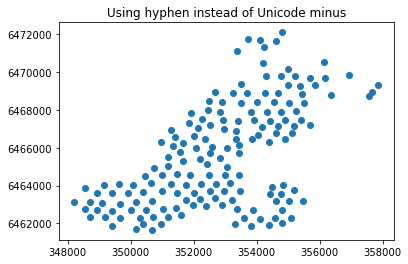

In [8]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['axes.unicode_minus'] = False
fig, ax = plt.subplots()
ax.plot(x_arr, y_arr, 'o')
ax.set_title('Using hyphen instead of Unicode minus')
plt.show()

In [9]:
min_x = int(np.min(x_arr))
min_y = int(np.min(y_arr))
max_x = int(np.max(x_arr))
max_y = int(np.max(y_arr))
h = 100

fake_x = []
fake_y = []

for x in range (min_x, max_x, h):
    for y in range (min_y, max_y, h):
        for idx, row in coord_data.iterrows():
            dist = np.sqrt((x - row['x'])*(x - row['x']) + (y - row['y'])*(y - row['y']))            
            if (dist <= 600):
                fake_x.append(x)
                fake_y.append(y)
                break
            

In [10]:
len(fake_x)

5399

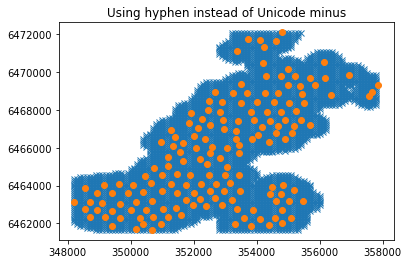

In [11]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['axes.unicode_minus'] = False
fig, ax = plt.subplots()
ax.plot(fake_x, fake_y, 'x')
ax.plot(x_arr, y_arr, 'o')
ax.set_title('Using hyphen instead of Unicode minus')
plt.show()

In [12]:
import os
def convert_trace_to_dev(x, y, idx, path, ext):
    if os.path.exists(path) == False:
        os.mkdir(path)
    
    filename = path + 'fake_' + str(idx) + "." + ext
    f = open(filename, 'w')
    f.write("# WELL TRACE FROM PETREL")
    f.write("\n# WELL NAME:  ")
    f.write('fake_' + str(idx))
    f.write("\n# WELL HEAD X-COORDINATE: ")
    f.write(str(x))
    f.write(" (m)")
    f.write("\n# WELL HEAD Y-COORDINATE: ")
    f.write(str(y))
    f.write(" (m)")

    f.write("\n# WELL DATUM (KB, Kelly bushing, from MSL): 115.89000000 (m)")
    f.write("\n# WELL TYPE:              UNKNOWN")
    f.write("\n# MD AND TVD ARE REFERENCED (=0) AT WELL DATUM AND INCREASE DOWNWARDS")
    f.write("\n# ANGLES ARE GIVEN IN DEGREES")
    f.write("\n# XYZ TRACE IS GIVEN IN COORDINATE SYSTEM Urmanskoe [DBX,600001]")
    f.write("\n# AZIMUTH REFERENCE TRUE NORTH")
    f.write("\n# DX DY ARE GIVEN IN GRID NORTH IN m-UNITS")
    f.write("\n# DEPTH (Z, tvd_z) GIVEN IN m-UNITS")

    f.write("\n#=====================================================")
    f.write("\n       MD              X              Y             Z ")
    f.write("\n#=====================================================")
    f.write("\n 0")
    f.write("   " + str(x))
    f.write(" " + str(y))
    f.write(" 0")
    
    f.write("\n 4000")
    f.write("   " + str(x))
    f.write(" " + str(y))
    f.write(" 4000")
    
    f.close

In [13]:
path = "C:\\WORK\\ML\\tasks\\task 6\\data\\fake_trace\\"
ext = "dev"
for i in range(0, len(fake_x) - 1):
    convert_trace_to_dev(fake_x[i], fake_y[i], i, path, ext)

In [14]:
fake_data = pd.DataFrame()
fake_data['X'] = fake_x
fake_data['Y'] = fake_y

In [15]:
fake_data.head()

,X,Y
0,348202,6462057
1,348202,6462157
2,348202,6462257
3,348202,6462357
4,348202,6462457


In [16]:
fake_data.to_csv('fake_wc.csv', sep =';', header =False, line_terminator = ';\n')